In [27]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [28]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
may_trip = pd.read_csv('../data/may_trip_cleaned.csv')
june_trip = pd.read_csv('../data/june_trip_cleaned.csv')
july_trip = pd.read_csv('../data/july_trip_cleaned.csv')

<AxesSubplot:>

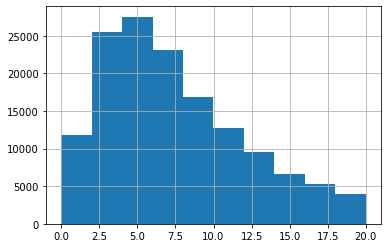

In [29]:
may_trip.tripDuration.hist()


<AxesSubplot:>

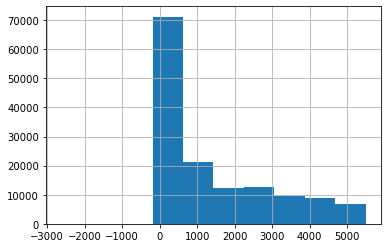

In [30]:
may_trip.tripDistance.hist()

<AxesSubplot:>

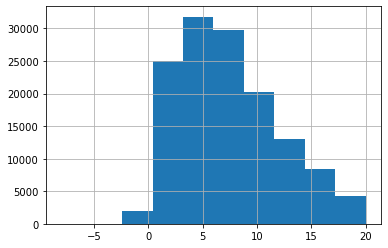

In [31]:
june_trip.tripDuration.hist()

<AxesSubplot:>

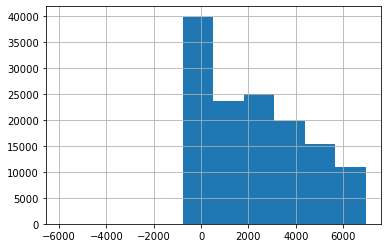

In [32]:
june_trip.tripDistance.hist()

<AxesSubplot:>

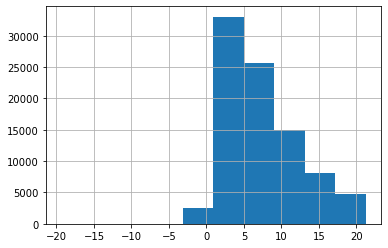

In [33]:
july_trip.tripDuration.hist()

<AxesSubplot:>

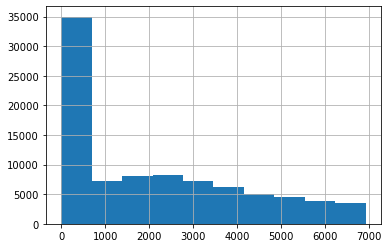

In [34]:
july_trip.tripDistance.hist()

In [58]:
may_trip.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,12,86933,2019-05-14 19:36:51.360000,Bird,BRD1354,PoweredHMJDG,3.00000,-2624.672,2019-05-14 00:00:00,19:34:54.086666,2019-05-14 00:00:00,19:38:12.580000,36.1621,-86.77430,36.16110,-86.77650,"[[36.161131,-86.776454],[36.159071,-86.77563]]",2019-05-15 05:31:34.027000
1,14,87589,2019-05-14 21:11:56.413000,Bird,BRD1675,PoweredUHZCQ,3.00000,-984.252,2019-05-14 00:00:00,21:11:02.400000,2019-05-14 00:00:00,21:13:41.736666,36.1612,-86.77740,36.15910,-86.77750,"[[36.159145,-86.777423],[36.161283,-86.777815]]",2019-05-15 05:31:43.310000
2,15,208756,2019-05-29 12:08:01.557000,Bird,BRD62,PoweredHI3E3,5.00000,-328.084,2019-05-29 00:00:00,12:04:03.326666,2019-05-29 00:00:00,12:09:15.250000,36.1518,-86.79310,36.15480,-86.78570,"[[36.151909,-86.793071],[36.151909,-86.793071]...",2019-05-30 05:30:58.460000
3,16,172637,2019-05-25 21:29:05.597000,Lyft,LFT1508,Powered798530,1.57165,0.000,2019-05-25 00:00:00,21:27:31.153333,2019-05-25 00:00:00,21:29:05.453333,36.1617,-86.77591,36.16173,-86.77588,"[[36.1617,-86.77591],[36.16173,-86.77588]]",2019-05-26 08:40:39.673000
4,17,172644,2019-05-25 21:29:11.477000,Bird,BRD5752,PoweredWXDXS,7.00000,0.000,2019-05-25 00:00:00,21:24:14.790000,2019-05-25 00:00:00,21:31:06.270000,36.1509,-86.78450,36.15210,-86.78430,"[[36.151064,-86.784191],[36.151185,-86.784291]...",2019-05-26 05:32:21.550000


In [35]:
june_trip.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,3,109160,2019-06-15 02:06:03.327000,Bird,BRD5693,PoweredC6FSV,11.0,-5905.512,2019-06-15 00:00:00,01:56:51.610000,2019-06-15 00:00:00,02:07:32.220000,36.1521,-86.8200,36.1562,-86.7953,"[[36.156272,-86.795204],[36.158674,-86.798545]...",2019-06-16 05:30:53.127000
1,4,7224,2019-06-01 19:46:42.407000,Bird,BRD3051,PoweredW1UN8,12.0,-4921.260,2019-06-01 00:00:00,19:36:04.780000,2019-06-01 00:00:00,19:48:30.236666,36.1466,-86.8090,36.1468,-86.8091,"[[36.147301,-86.808798],[36.147019,-86.808903]...",2019-06-02 05:31:35.083000
2,5,107263,2019-06-14 22:55:55.413000,Bird,BRD3928,PoweredBJQFW,5.0,-2952.756,2019-06-14 00:00:00,22:51:39.233333,2019-06-14 00:00:00,22:56:12.100000,36.1611,-86.7808,36.1568,-86.7763,"[[36.161107,-86.78075],[36.161279,-86.780883],...",2019-06-15 05:31:44.750000
3,6,109197,2019-06-15 02:11:03.950000,Bird,BRD5746,PoweredQV5IE,13.0,-1968.504,2019-06-15 00:00:00,01:58:31.310000,2019-06-15 00:00:00,02:11:26.276666,36.1554,-86.7809,36.1554,-86.7810,"[[36.160226,-86.778499],[36.160196,-86.778414]...",2019-06-16 05:30:53.957000
4,8,109318,2019-06-15 02:26:04.337000,Bird,BRD5864,PoweredP6CSN,2.0,-656.168,2019-06-15 00:00:00,02:24:56.456666,2019-06-15 00:00:00,02:27:05.510000,36.1581,-86.7840,36.1581,-86.7842,"[[36.1581,-86.78397],[36.1581,-86.78397],[36.1...",2019-06-16 05:30:55.443000


In [36]:
july_trip.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,4,38247,2019-07-08 18:26:23.373000,Bird,BRD995,PoweredW8U75,4.0,0.0,2019-07-08 00:00:00,18:22:24.186666,2019-07-08 00:00:00,18:26:52.806666,36.1409,-86.8094,36.1441,-86.8022,"[[36.140974,-86.809323],[36.140957,-86.809313]...",2019-07-09 05:31:10.330000
1,5,38248,2019-07-08 18:26:23.373000,Bird,BRD993,PoweredZS33F,2.0,0.0,2019-07-08 00:00:00,18:25:26.156666,2019-07-08 00:00:00,18:27:11.056666,36.1438,-86.8062,36.1413,-86.8051,"[[36.141364,-86.805007],[36.143591,-86.806478]...",2019-07-09 05:31:10.270000
2,6,38249,2019-07-08 18:26:23.373000,Bird,BRD994,Powered51G5F,3.0,0.0,2019-07-08 00:00:00,18:24:34.650000,2019-07-08 00:00:00,18:27:25.503333,36.1427,-86.8001,36.1437,-86.7959,"[[36.142708,-86.800057],[36.142893,-86.800109]...",2019-07-09 05:31:10.300000
3,7,38250,2019-07-08 18:26:23.373000,Bird,BRD992,PoweredA3YRB,2.0,0.0,2019-07-08 00:00:00,18:25:30.676666,2019-07-08 00:00:00,18:27:11.773333,36.1507,-86.7825,36.1512,-86.7826,"[[36.151261,-86.782506],[36.151058,-86.782437]...",2019-07-09 05:31:10.233000
4,8,38251,2019-07-08 18:26:23.373000,Bird,BRD991,PoweredJEH2C,2.0,0.0,2019-07-08 00:00:00,18:25:49.916666,2019-07-08 00:00:00,18:28:07.386666,36.1624,-86.7745,36.1616,-86.7759,"[[36.16248,-86.774425],[36.162464,-86.774395],...",2019-07-09 05:31:10.203000


In [61]:
may_gdf = gpd.GeoDataFrame(
    may_trip, geometry=gpd.points_from_xy(may_trip.startLongitude, may_trip.startLatitude))

In [66]:
may_gdf = may_gdf.set_crs('epsg:4326')

In [63]:
may_gdf.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,12,86933,2019-05-14 19:36:51.360000,Bird,BRD1354,PoweredHMJDG,3.00000,-2624.672,2019-05-14 00:00:00,19:34:54.086666,2019-05-14 00:00:00,19:38:12.580000,36.1621,-86.77430,36.16110,-86.77650,"[[36.161131,-86.776454],[36.159071,-86.77563]]",2019-05-15 05:31:34.027000,POINT (-86.77430 36.16210)
1,14,87589,2019-05-14 21:11:56.413000,Bird,BRD1675,PoweredUHZCQ,3.00000,-984.252,2019-05-14 00:00:00,21:11:02.400000,2019-05-14 00:00:00,21:13:41.736666,36.1612,-86.77740,36.15910,-86.77750,"[[36.159145,-86.777423],[36.161283,-86.777815]]",2019-05-15 05:31:43.310000,POINT (-86.77740 36.16120)
2,15,208756,2019-05-29 12:08:01.557000,Bird,BRD62,PoweredHI3E3,5.00000,-328.084,2019-05-29 00:00:00,12:04:03.326666,2019-05-29 00:00:00,12:09:15.250000,36.1518,-86.79310,36.15480,-86.78570,"[[36.151909,-86.793071],[36.151909,-86.793071]...",2019-05-30 05:30:58.460000,POINT (-86.79310 36.15180)
3,16,172637,2019-05-25 21:29:05.597000,Lyft,LFT1508,Powered798530,1.57165,0.000,2019-05-25 00:00:00,21:27:31.153333,2019-05-25 00:00:00,21:29:05.453333,36.1617,-86.77591,36.16173,-86.77588,"[[36.1617,-86.77591],[36.16173,-86.77588]]",2019-05-26 08:40:39.673000,POINT (-86.77591 36.16170)
4,17,172644,2019-05-25 21:29:11.477000,Bird,BRD5752,PoweredWXDXS,7.00000,0.000,2019-05-25 00:00:00,21:24:14.790000,2019-05-25 00:00:00,21:31:06.270000,36.1509,-86.78450,36.15210,-86.78430,"[[36.151064,-86.784191],[36.151185,-86.784291]...",2019-05-26 05:32:21.550000,POINT (-86.78450 36.15090)


In [72]:
june_gdf = gpd.GeoDataFrame(
    june_trip, geometry=gpd.points_from_xy(june_trip.startLongitude, june_trip.startLatitude))

In [75]:
june_gdf = june_gdf.set_crs('epsg:4326')

In [76]:
june_gdf.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,3,109160,2019-06-15 02:06:03.327000,Bird,BRD5693,PoweredC6FSV,11.0,-5905.512,2019-06-15 00:00:00,01:56:51.610000,2019-06-15 00:00:00,02:07:32.220000,36.1521,-86.8200,36.1562,-86.7953,"[[36.156272,-86.795204],[36.158674,-86.798545]...",2019-06-16 05:30:53.127000,POINT (-86.82000 36.15210)
1,4,7224,2019-06-01 19:46:42.407000,Bird,BRD3051,PoweredW1UN8,12.0,-4921.260,2019-06-01 00:00:00,19:36:04.780000,2019-06-01 00:00:00,19:48:30.236666,36.1466,-86.8090,36.1468,-86.8091,"[[36.147301,-86.808798],[36.147019,-86.808903]...",2019-06-02 05:31:35.083000,POINT (-86.80900 36.14660)
2,5,107263,2019-06-14 22:55:55.413000,Bird,BRD3928,PoweredBJQFW,5.0,-2952.756,2019-06-14 00:00:00,22:51:39.233333,2019-06-14 00:00:00,22:56:12.100000,36.1611,-86.7808,36.1568,-86.7763,"[[36.161107,-86.78075],[36.161279,-86.780883],...",2019-06-15 05:31:44.750000,POINT (-86.78080 36.16110)
3,6,109197,2019-06-15 02:11:03.950000,Bird,BRD5746,PoweredQV5IE,13.0,-1968.504,2019-06-15 00:00:00,01:58:31.310000,2019-06-15 00:00:00,02:11:26.276666,36.1554,-86.7809,36.1554,-86.7810,"[[36.160226,-86.778499],[36.160196,-86.778414]...",2019-06-16 05:30:53.957000,POINT (-86.78090 36.15540)
4,8,109318,2019-06-15 02:26:04.337000,Bird,BRD5864,PoweredP6CSN,2.0,-656.168,2019-06-15 00:00:00,02:24:56.456666,2019-06-15 00:00:00,02:27:05.510000,36.1581,-86.7840,36.1581,-86.7842,"[[36.1581,-86.78397],[36.1581,-86.78397],[36.1...",2019-06-16 05:30:55.443000,POINT (-86.78400 36.15810)


In [73]:
july_gdf = gpd.GeoDataFrame(
    july_trip, geometry=gpd.points_from_xy(july_trip.startLongitude, july_trip.startLatitude))

In [74]:
july_gdf = july_gdf.set_crs('epsg:4326')

In [77]:
july_gdf.head()

,Unnamed: 0,index,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,4,38247,2019-07-08 18:26:23.373000,Bird,BRD995,PoweredW8U75,4.0,0.0,2019-07-08 00:00:00,18:22:24.186666,2019-07-08 00:00:00,18:26:52.806666,36.1409,-86.8094,36.1441,-86.8022,"[[36.140974,-86.809323],[36.140957,-86.809313]...",2019-07-09 05:31:10.330000,POINT (-86.80940 36.14090)
1,5,38248,2019-07-08 18:26:23.373000,Bird,BRD993,PoweredZS33F,2.0,0.0,2019-07-08 00:00:00,18:25:26.156666,2019-07-08 00:00:00,18:27:11.056666,36.1438,-86.8062,36.1413,-86.8051,"[[36.141364,-86.805007],[36.143591,-86.806478]...",2019-07-09 05:31:10.270000,POINT (-86.80620 36.14380)
2,6,38249,2019-07-08 18:26:23.373000,Bird,BRD994,Powered51G5F,3.0,0.0,2019-07-08 00:00:00,18:24:34.650000,2019-07-08 00:00:00,18:27:25.503333,36.1427,-86.8001,36.1437,-86.7959,"[[36.142708,-86.800057],[36.142893,-86.800109]...",2019-07-09 05:31:10.300000,POINT (-86.80010 36.14270)
3,7,38250,2019-07-08 18:26:23.373000,Bird,BRD992,PoweredA3YRB,2.0,0.0,2019-07-08 00:00:00,18:25:30.676666,2019-07-08 00:00:00,18:27:11.773333,36.1507,-86.7825,36.1512,-86.7826,"[[36.151261,-86.782506],[36.151058,-86.782437]...",2019-07-09 05:31:10.233000,POINT (-86.78250 36.15070)
4,8,38251,2019-07-08 18:26:23.373000,Bird,BRD991,PoweredJEH2C,2.0,0.0,2019-07-08 00:00:00,18:25:49.916666,2019-07-08 00:00:00,18:28:07.386666,36.1624,-86.7745,36.1616,-86.7759,"[[36.16248,-86.774425],[36.162464,-86.774395],...",2019-07-09 05:31:10.203000,POINT (-86.77450 36.16240)


In [37]:
print(promise_zone.crs)

epsg:2274


In [38]:
promise_zone = promise_zone.to_crs('EPSG:4326')

In [39]:
print(promise_zone.crs)

EPSG:4326


In [40]:
type(promise_zone)

geopandas.geodataframe.GeoDataFrame

In [41]:
promise_zone.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


In [42]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')

In [43]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [44]:
type(bus_stops)

pandas.core.frame.DataFrame

In [45]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = promise_zone.crs, 
                           geometry = bus_stops['geometry'])

In [46]:
promise_geo = gpd.GeoDataFrame(promise_zone,
                              crs = bus_geo.crs,
                              geometry = promise_zone['geometry'])

In [69]:
may_geo = gpd.GeoDataFrame(may_gdf,
                              crs = may_gdf.crs,
                              geometry = may_gdf['geometry'])

In [79]:
june_geo = gpd.GeoDataFrame(june_gdf,
                              crs = june_gdf.crs,
                              geometry = june_gdf['geometry'])

In [78]:
july_geo = gpd.GeoDataFrame(july_gdf,
                              crs = july_gdf.crs,
                              geometry = july_gdf['geometry'])

In [47]:
promise_stops = gpd.sjoin(bus_geo, promise_geo, op = 'within')


In [70]:
may_start = gpd.sjoin(may_geo, promise_geo, op = 'within')

In [80]:
june_start = gpd.sjoin(june_geo, promise_geo, op = 'within')

In [81]:
july_start = gpd.sjoin(june_geo, promise_geo, op = 'within')

<AxesSubplot:>

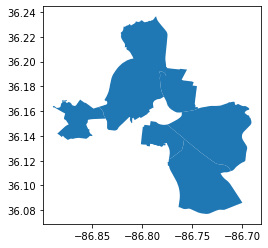

In [48]:
promise_zone.plot()

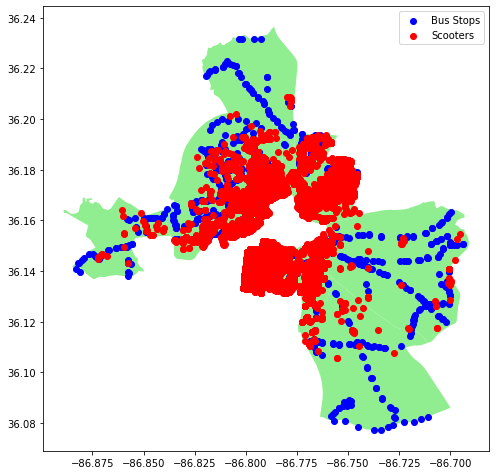

In [85]:
#fig, ax = matplotlib.subplots()
ax = promise_zone.plot(figsize = (8, 10), color = 'lightgreen')
promise_stops.plot( ax = ax, color = 'blue', label = 'Bus Stops')
may_start.plot(ax=ax, color = 'red', label = 'Scooter Trips *')
ax.legend();
plt.show();

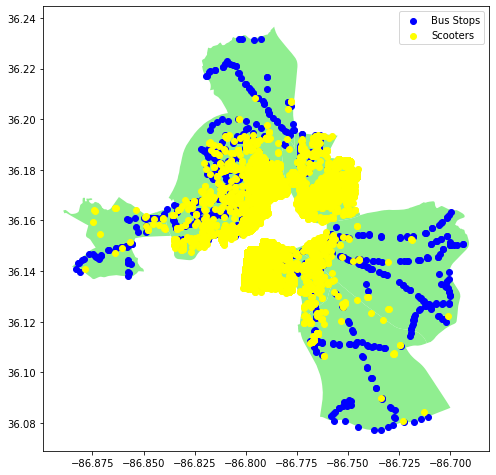

In [88]:
#fig, ax = matplotlib.subplots()
ax = promise_zone.plot(figsize = (8, 10), color = 'lightgreen')
promise_stops.plot( ax = ax, color = 'blue', label = 'Bus Stops')
june_start.plot(ax=ax, color = 'yellow', label = 'Scooter Trips *')
ax.legend();
plt.show();

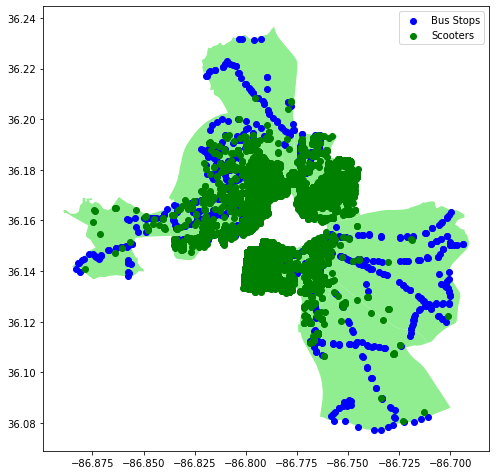

In [89]:
#fig, ax = matplotlib.subplots()
ax = promise_zone.plot(figsize = (8, 10), color = 'lightgreen')
promise_stops.plot( ax = ax, color = 'blue', label = 'Bus Stops')
july_start.plot(ax=ax, color = 'green', label = 'Scooters')
ax.legend();
plt.show();

In [50]:
area_center = [36.174465, -86.767960]

In [51]:
map_nash = folium.Map(location =  area_center, zoom_start = 12)
map_nash


In [52]:
folium.GeoJson(promise_zone).add_to(map_nash)



In [53]:
marker_cluster = MarkerCluster().add_to(map_nash)

for row_index, row_values in promise_stops.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster)

In [54]:
#map_nash
